In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import make_pipeline,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [2]:
laptop_data=pd.read_csv("laptop_price.csv",encoding="latin-1")

In [3]:
laptop_data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
len(laptop_data["Inches"].unique())

18

In [5]:
laptop_data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
laptop_data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
#testing
def transformer(dataset):
    encoder=OrdinalEncoder(dtype=int)
    wt=[]
    ram=[]
    x_res=[]
    y_res=[]
    all_res=[]
    scrn_type=[]
    cpu_freq=[]
    cpu_type=[]
    for i in list(dataset.columns):
        X=dataset[i]
        if i=='Weight':
            for j in X:
                wt.append(float(j.split("kg")[0]))
            dataset.drop("Weight",axis=1,inplace=True)
            dataset["Weight(kg)"]=wt
        
        elif i=="Ram":
            for j in X:
                ram.append(int(j.split("GB")[0]))
            
            dataset.drop("Ram",axis=1,inplace=True)
            dataset["Ram(GB)"]=ram
    
        elif i=="ScreenResolution":
            most_freq=X.value_counts().keys()[0]
            for j in X.values:
                temp=re.search(r"(\d{3,4}x\d{3,4})",j).group()
                temp2=j.split(temp)
                temp=temp.split('x')
                if temp2[0]=='':
                    scrn_type.append(most_freq)
                    x_res.append(int(temp[0]))
                    y_res.append(int(temp[1]))
                    all_res.append([most_freq,int(temp[0]),int(temp[1])])
                else:
                    scrn_type.append(temp2[0])
                    x_res.append(int(temp[0]))
                    y_res.append(int(temp[1]))
                    all_res.append([temp2[0],int(temp[0]),int(temp[1])])
            dataset["X_Res"]=x_res
            dataset["Y_Res"]=y_res
            dataset["Screen_type"]=scrn_type
            dataset.drop("ScreenResolution",axis=1,inplace=True)
        elif i=="Cpu":
            for j in X.values:
                temp=re.search(r'(\d{1}.\d{0,2}GHz)',j)
                if temp:
                    temp0=re.split(r'(\d{1}.\d{0,2}GHz)',j)[0]
                    temp=temp.group().split('GHz')[0]
                    if re.search(r'(\d \d)',temp):
                        temp=temp.split(" ")[1]
                        cpu_freq.append(float(temp))
                    else:
                        cpu_freq.append(float(temp))
                
                    cpu_type.append(temp0)
                else:

                    temp0=re.split(r'(\d{1}GHz)',j)[0]
                    temp=re.search(r'(\d{1}GHz)',j).group().split('GHz')[0]
                    cpu_freq.append(float(temp))
                    cpu_type.append(temp0)
            dataset.drop("Cpu",axis=1,inplace=True)
            dataset["Cpu_freq(GHz)"]=cpu_freq
            dataset["Cpu_type"]=cpu_type
        elif i not in ["Ram",'Cpu',"Weight","ScreenResolution","Price_euros","Inches"]:
            dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))   
    dataset["Screen_type"]   =dataset["Screen_type"].replace(to_replace= dataset["Screen_type"] .unique(),value=range(len( dataset["Screen_type"] .unique())))
    dataset["Cpu_type"]   =dataset["Cpu_type"].replace(to_replace= dataset["Cpu_type"] .unique(),value=range(len( dataset["Cpu_type"] .unique())))

    
            
    return dataset

In [73]:
from sklearn.base import TransformerMixin, BaseEstimator
class Transformer(TransformerMixin,BaseEstimator):
    def __init__(self):
        self.wt=[]
        self.ram=[]
        self.x_res=[]
        self.y_res=[]
        self.all_res=[]
        self.scrn_type=[]
        self.cpu_freq=[]
        self.cpu_type=[]
    def fit(self,dataset,y=None):
        encoder=OrdinalEncoder(dtype=int)
        self.dataset=dataset
        for i in list(dataset.columns):
            X=dataset[i]
            if i=='Weight':
                for j in X:
                    self.wt.append(float(j.split("kg")[0]))
           
        
        
            elif i=="Ram":
                for j in X:
                    self.ram.append(int(j.split("GB")[0]))
            
            
    
            elif i=="ScreenResolution":
                most_freq=X.value_counts().keys()[0]
                for j in X.values:
                    temp=re.search(r"(\d{3,4}x\d{3,4})",j).group()
                    temp2=j.split(temp)
                    temp=temp.split('x')
                    if temp2[0]=='':
                        self.scrn_type.append(most_freq)
                        self.x_res.append(int(temp[0]))
                        self.y_res.append(int(temp[1]))
                        self.all_res.append([most_freq,int(temp[0]),int(temp[1])])
                    else:
                        self.scrn_type.append(temp2[0])
                        self.x_res.append(int(temp[0]))
                        self.y_res.append(int(temp[1]))
                        self.all_res.append([temp2[0],int(temp[0]),int(temp[1])])
            
            elif i=="Cpu":
                for j in X.values:
                    temp=re.search(r'(\d{1}.\d{0,2}GHz)',j)
                    if temp:
                        temp0=re.split(r'(\d{1}.\d{0,2}GHz)',j)[0]
                        temp=temp.group().split('GHz')[0]
                        if re.search(r'(\d \d)',temp):
                            temp=temp.split(" ")[1]
                            self.cpu_freq.append(float(temp))
                        else:
                            self.cpu_freq.append(float(temp))
                
                        self.cpu_type.append(temp0)
                    else:
                        temp0=re.split(r'(\d{1}GHz)',j)[0]
                        temp=re.search(r'(\d{1}GHz)',j).group().split('GHz')[0]
                        self.cpu_freq.append(float(temp))
                        self.cpu_type.append(temp0)
            elif i not in ["Ram",'Cpu',"Weight","ScreenResolution","Price_euros","Inches"]:
                self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique()))) 
        return self
    def transform(self,X):
        self.dataset.drop("Ram",axis=1,inplace=True)
        self.dataset["Ram(GB)"]=self.ram
        self.dataset.drop("Cpu",axis=1,inplace=True)
        self.dataset["Cpu_freq(GHz)"]=self.cpu_freq
        self.dataset["Cpu_type"]=self.cpu_type
        self.dataset["X_Res"]=self.x_res
        self.dataset["Y_Res"]=self.y_res
        self.dataset["Screen_type"]=self.scrn_type
        self.dataset.drop("ScreenResolution",axis=1,inplace=True)
        self.dataset["Screen_type"]   = self.dataset["Screen_type"].replace(to_replace= self.dataset["Screen_type"] .unique(),value=range(len( self.dataset["Screen_type"] .unique())))
        self.dataset["Cpu_type"]   = self.dataset["Cpu_type"].replace(to_replace= self.dataset["Cpu_type"] .unique(),value=range(len( self.dataset["Cpu_type"] .unique())))

        return self.dataset
       

    
            


In [74]:
to_check=laptop_data.copy()
Tran=Transformer()
to_check_new=Tran.fit_transform(to_check)

/tmp/ipykernel_930563/344073112.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_930563/344073112.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_930563/344073112.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

In [75]:
to_check.head(0)

,laptop_ID,Company,Product,TypeName,Inches,Memory,Gpu,OpSys,Weight,Price_euros,Ram(GB),Cpu_freq(GHz),Cpu_type,X_Res,Y_Res,Screen_type


In [11]:
to_check=transformer(to_check)

/tmp/ipykernel_930563/3853491886.py:70: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_930563/3853491886.py:70: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_930563/3853491886.py:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [12]:
to_check

,laptop_ID,Company,Product,TypeName,Inches,Memory,Gpu,OpSys,Price_euros,X_Res,Y_Res,Screen_type,Cpu_freq(GHz),Cpu_type,Ram(GB),Weight(kg)
0,0,0,0,0,13.3,0,0,0,1339.69,2560,1600,0,2.3,0,8,1.37
1,1,0,1,0,13.3,1,1,0,898.94,1440,900,1,1.8,0,8,1.34
2,2,1,2,1,15.6,2,2,1,575.00,1920,1080,2,2.5,1,8,1.86
3,3,0,0,0,15.4,3,3,0,2537.45,2880,1800,0,2.7,2,16,1.83
4,4,0,0,0,13.3,2,4,0,1803.60,2560,1600,0,3.1,0,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,5,615,4,14.0,0,9,2,638.00,1920,1080,4,2.5,34,4,1.80
1299,1299,5,404,4,13.3,3,9,2,1499.00,3200,1800,16,2.5,34,16,1.30
1300,1300,5,342,1,14.0,10,20,2,229.00,1366,768,1,1.6,68,2,1.50
1301,1301,1,616,1,15.6,6,101,2,764.00,1366,768,1,2.5,34,6,2.19


In [13]:
num_features=to_check.drop(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'Memory',
       'Gpu', 'OpSys','Cpu_type',"Screen_type"])

In [14]:
num_features.corr()["Price_euros"]

Inches           0.068197
Price_euros      1.000000
X_Res            0.556529
Y_Res            0.552809
Cpu_freq(GHz)    0.430293
Ram(GB)          0.743007
Weight(kg)       0.210370
Name: Price_euros, dtype: float64

array([[<Axes: xlabel='Inches', ylabel='Inches'>,
        <Axes: xlabel='Price_euros', ylabel='Inches'>,
        <Axes: xlabel='X_Res', ylabel='Inches'>,
        <Axes: xlabel='Y_Res', ylabel='Inches'>,
        <Axes: xlabel='Cpu_freq(GHz)', ylabel='Inches'>,
        <Axes: xlabel='Ram(GB)', ylabel='Inches'>,
        <Axes: xlabel='Weight(kg)', ylabel='Inches'>],
       [<Axes: xlabel='Inches', ylabel='Price_euros'>,
        <Axes: xlabel='Price_euros', ylabel='Price_euros'>,
        <Axes: xlabel='X_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Y_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Cpu_freq(GHz)', ylabel='Price_euros'>,
        <Axes: xlabel='Ram(GB)', ylabel='Price_euros'>,
        <Axes: xlabel='Weight(kg)', ylabel='Price_euros'>],
       [<Axes: xlabel='Inches', ylabel='X_Res'>,
        <Axes: xlabel='Price_euros', ylabel='X_Res'>,
        <Axes: xlabel='X_Res', ylabel='X_Res'>,
        <Axes: xlabel='Y_Res', ylabel='X_Res'>,
        <Axes: xlabel='Cpu_freq(GH

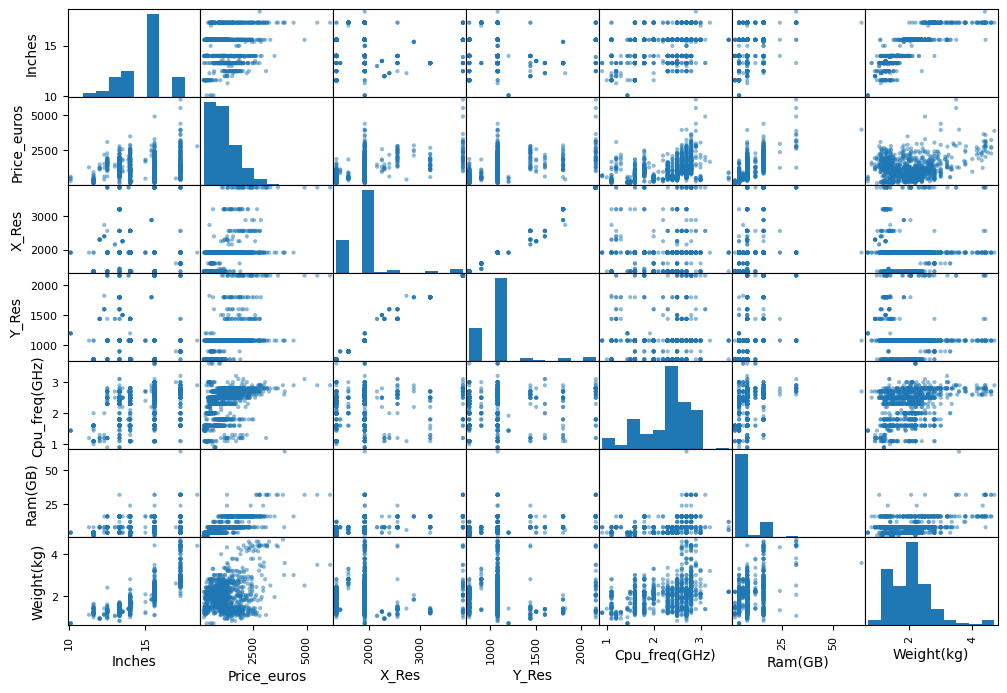

In [15]:

scatter_matrix(num_features,figsize=(12,8))

In [16]:
laptop_data["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company', ylabel='count'>

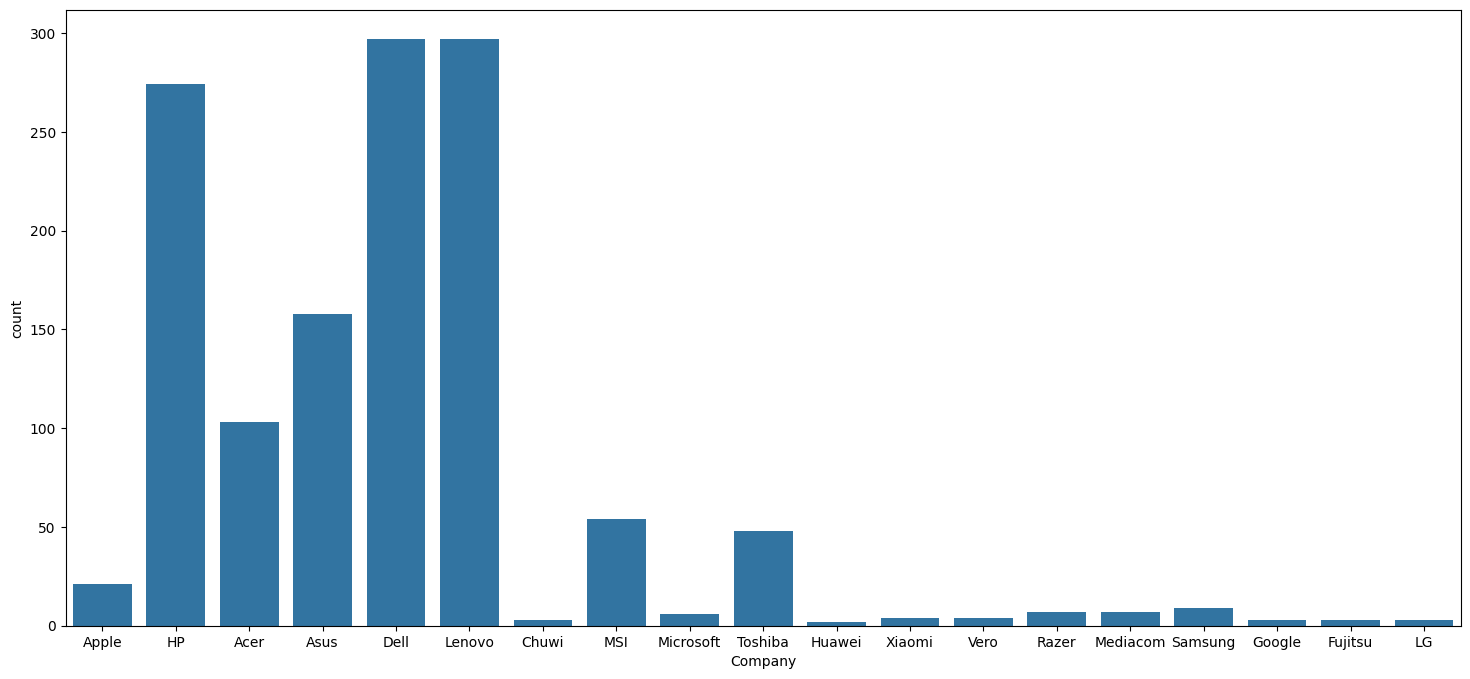

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(data=laptop_data,x="Company")

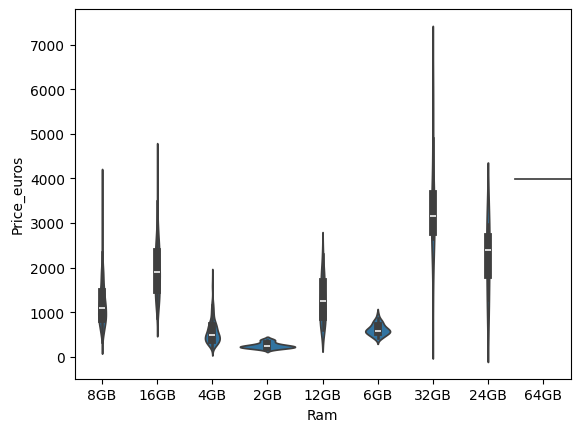

In [18]:
sns.violinplot(data=laptop_data,x="Ram",y="Price_euros",width=1)
plt.show()

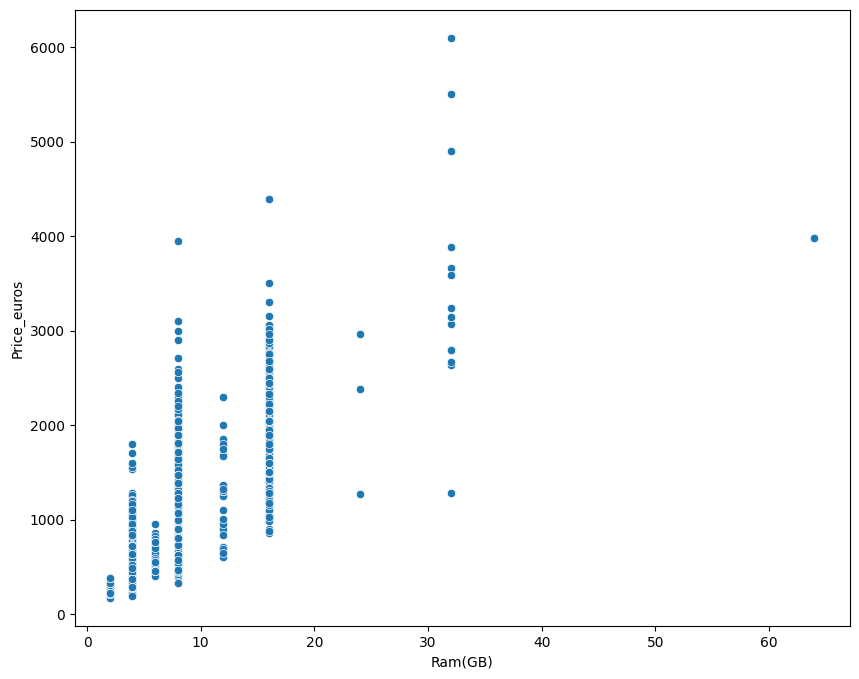

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=to_check,x="Ram(GB)",y="Price_euros")
plt.show()

In [20]:
to_check["Y_Res"]

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_Res, Length: 1303, dtype: int64

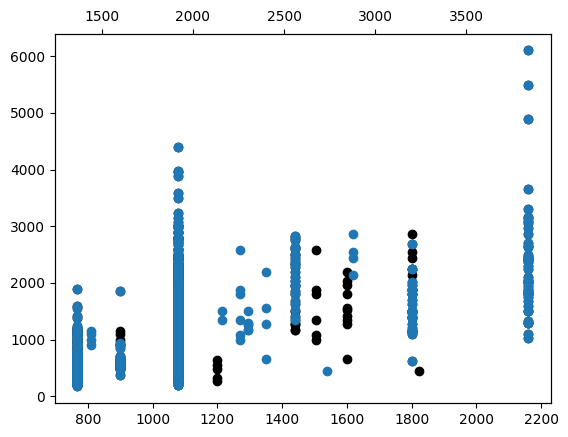

In [21]:
x1=plt.subplot()
x2=plt.twiny()
x2.scatter(to_check["X_Res"],to_check["Price_euros"])
x1.scatter(to_check["Y_Res"],to_check["Price_euros"],color="black")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
features=to_check.drop("Price_euros",axis=1)
label=to_check["Price_euros"]

In [24]:
# train_features

In [25]:
stratify=['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Memory',
       'Gpu', 'OpSys', 'X_Res', 'Y_Res', 'Screen_type',
       'Cpu_freq(GHz)', 'Cpu_type', 'Ram(GB)', 'Weight(kg)']

In [55]:
trainx,testx,trainy,testy=train_test_split(features,label,test_size=0.2)

In [56]:
trainy

151      899.00
1283     720.32
807      629.00
871      479.00
929     1149.00
         ...   
1217     539.00
523      689.00
446      441.80
76       519.00
491     2799.00
Name: Price_euros, Length: 1042, dtype: float64

In [28]:
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
class ClusterClone(TransformerMixin,BaseEstimator):
    def __init__(self,n_clusters=10,gamma=1,random_state=42):
        self.n_clusters=n_clusters
        self.gamma= gamma
        self.random_state= random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans=KMeans(n_clusters=self.n_clusters)
        self.kmeans.fit(X,sample_weight=sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans.cluster_centers_,gamma=self.gamma,)
    def get_feature_names_out(self,names=None):
        return [f"{i} cluster similarity" for i in self.kmeans.cluster_centers_]




In [29]:
cluster=ClusterClone()
simil=cluster.fit_transform(to_check[["Ram(GB)","Cpu_freq(GHz)"]],sample_weight=to_check["Price_euros"])


In [30]:
to_check["Gpu_max_similarity"]=simil.max(axis=1)

/tmp/ipykernel_930563/741035725.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


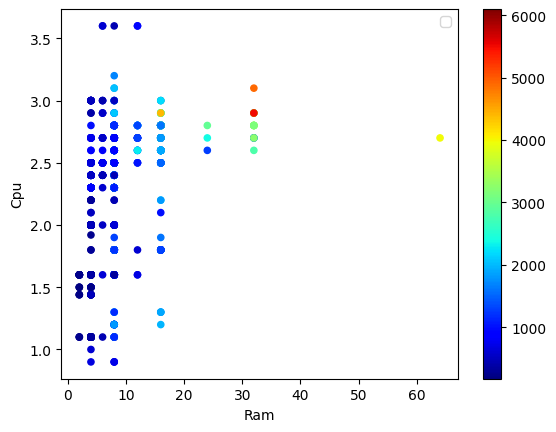

In [31]:
to_check.plot(kind="scatter",x="Ram(GB)",y="Cpu_freq(GHz)",c=to_check["Price_euros"],cmap="jet",)
plt.xlabel("Ram")
plt.ylabel("Cpu")
plt.get_cmap()
plt.legend()

In [32]:
res_simil=cluster.fit_transform(to_check[["X_Res","Y_Res"]],sample_weight=to_check["Price_euros"])
to_check["Resolution_max_similarity"]=res_simil.max(axis=1)

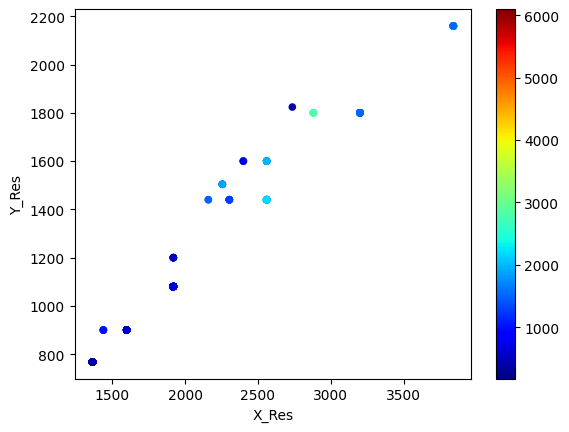

In [33]:
to_check.plot(kind="scatter",x="X_Res",y="Y_Res",c=to_check["Price_euros"],cmap="jet")
plt.show()

<Axes: xlabel='Screen_type', ylabel='Count'>

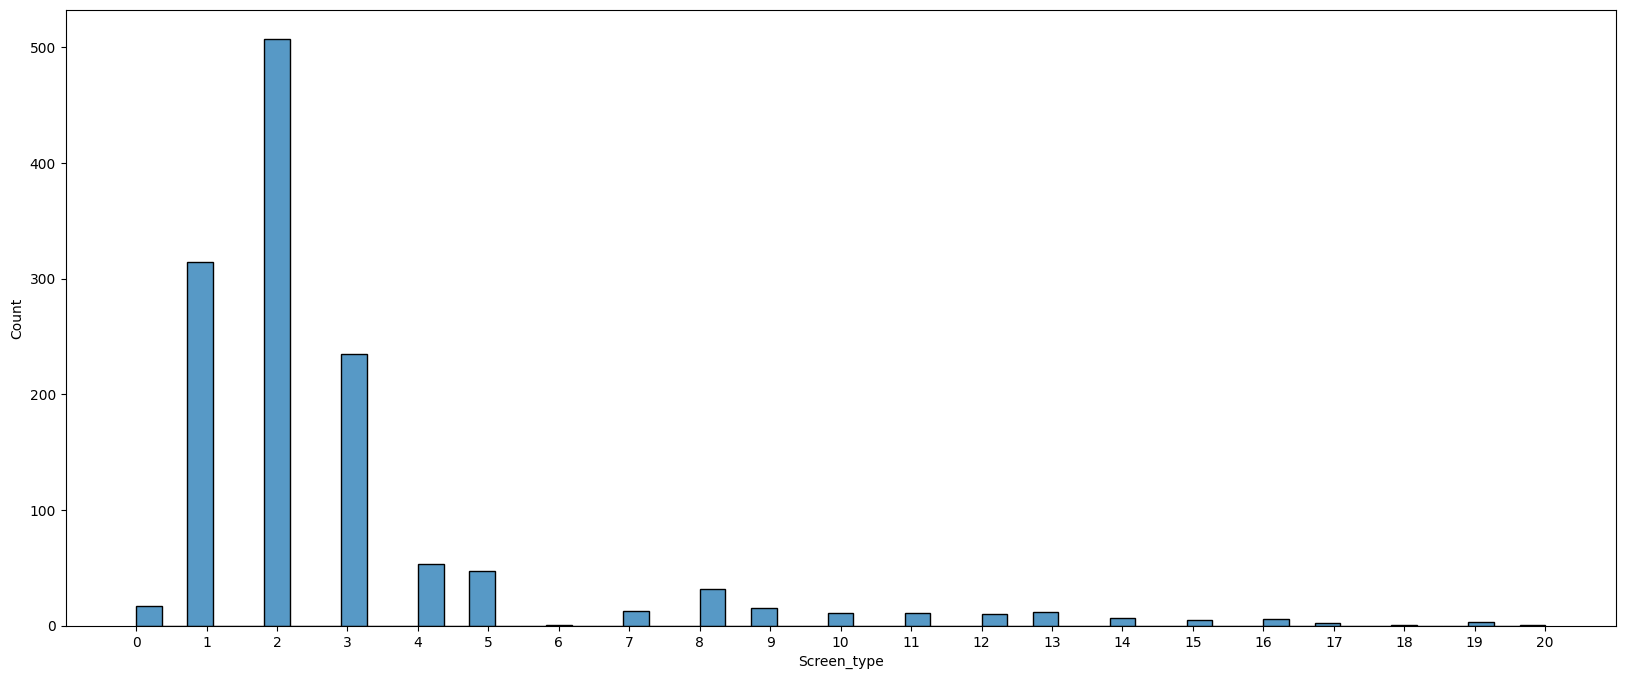

In [34]:
plt.figure(figsize=(20,8))
plt.xticks(to_check["Screen_type"].unique())
sns.histplot(data=to_check,x="Screen_type")

In [38]:
laptop_data["Company"].value_counts().keys()

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object', name='Company')

([<matplotlib.patches.Wedge at 0x757a5d098c20>,
 [Text(0.7543843332739008, 0.6564329955988595, 'Dell'),
  Text(-0.5458854117093117, 0.8378598434600832, 'Lenovo'),
  Text(-0.9274144688226601, -0.3740352964873546, 'HP'),
  Text(-0.14535145790458645, -0.9893800855510542, 'Asus'),
  Text(0.46480534224008946, -0.885412894544163, 'Acer'),
  Text(0.7591126798082852, -0.6509592455402133, 'MSI'),
  Text(0.8947520250994075, -0.44656333658341146, 'Toshiba'),
  Text(0.9563478422609858, -0.29223073863431376, 'Apple'),
  Text(0.9749662341135263, -0.22235296791023162, 'Samsung'),
  Text(0.982816392796901, -0.18458585549734707, 'Razer'),
  Text(0.9884859934310255, -0.1513123947027427, 'Mediacom'),
  Text(0.9927423763868652, -0.12026044289690417, 'Microsoft'),
  Text(0.9953530961425346, -0.09629233614089029, 'Xiaomi'),
  Text(0.9970251524041153, -0.0770768802790478, 'Vero'),
  Text(0.9981839469195978, -0.060239589241740464, 'Chuwi'),
  Text(0.9989509142624753, -0.04579378663273833, 'Google'),
  Text(0.

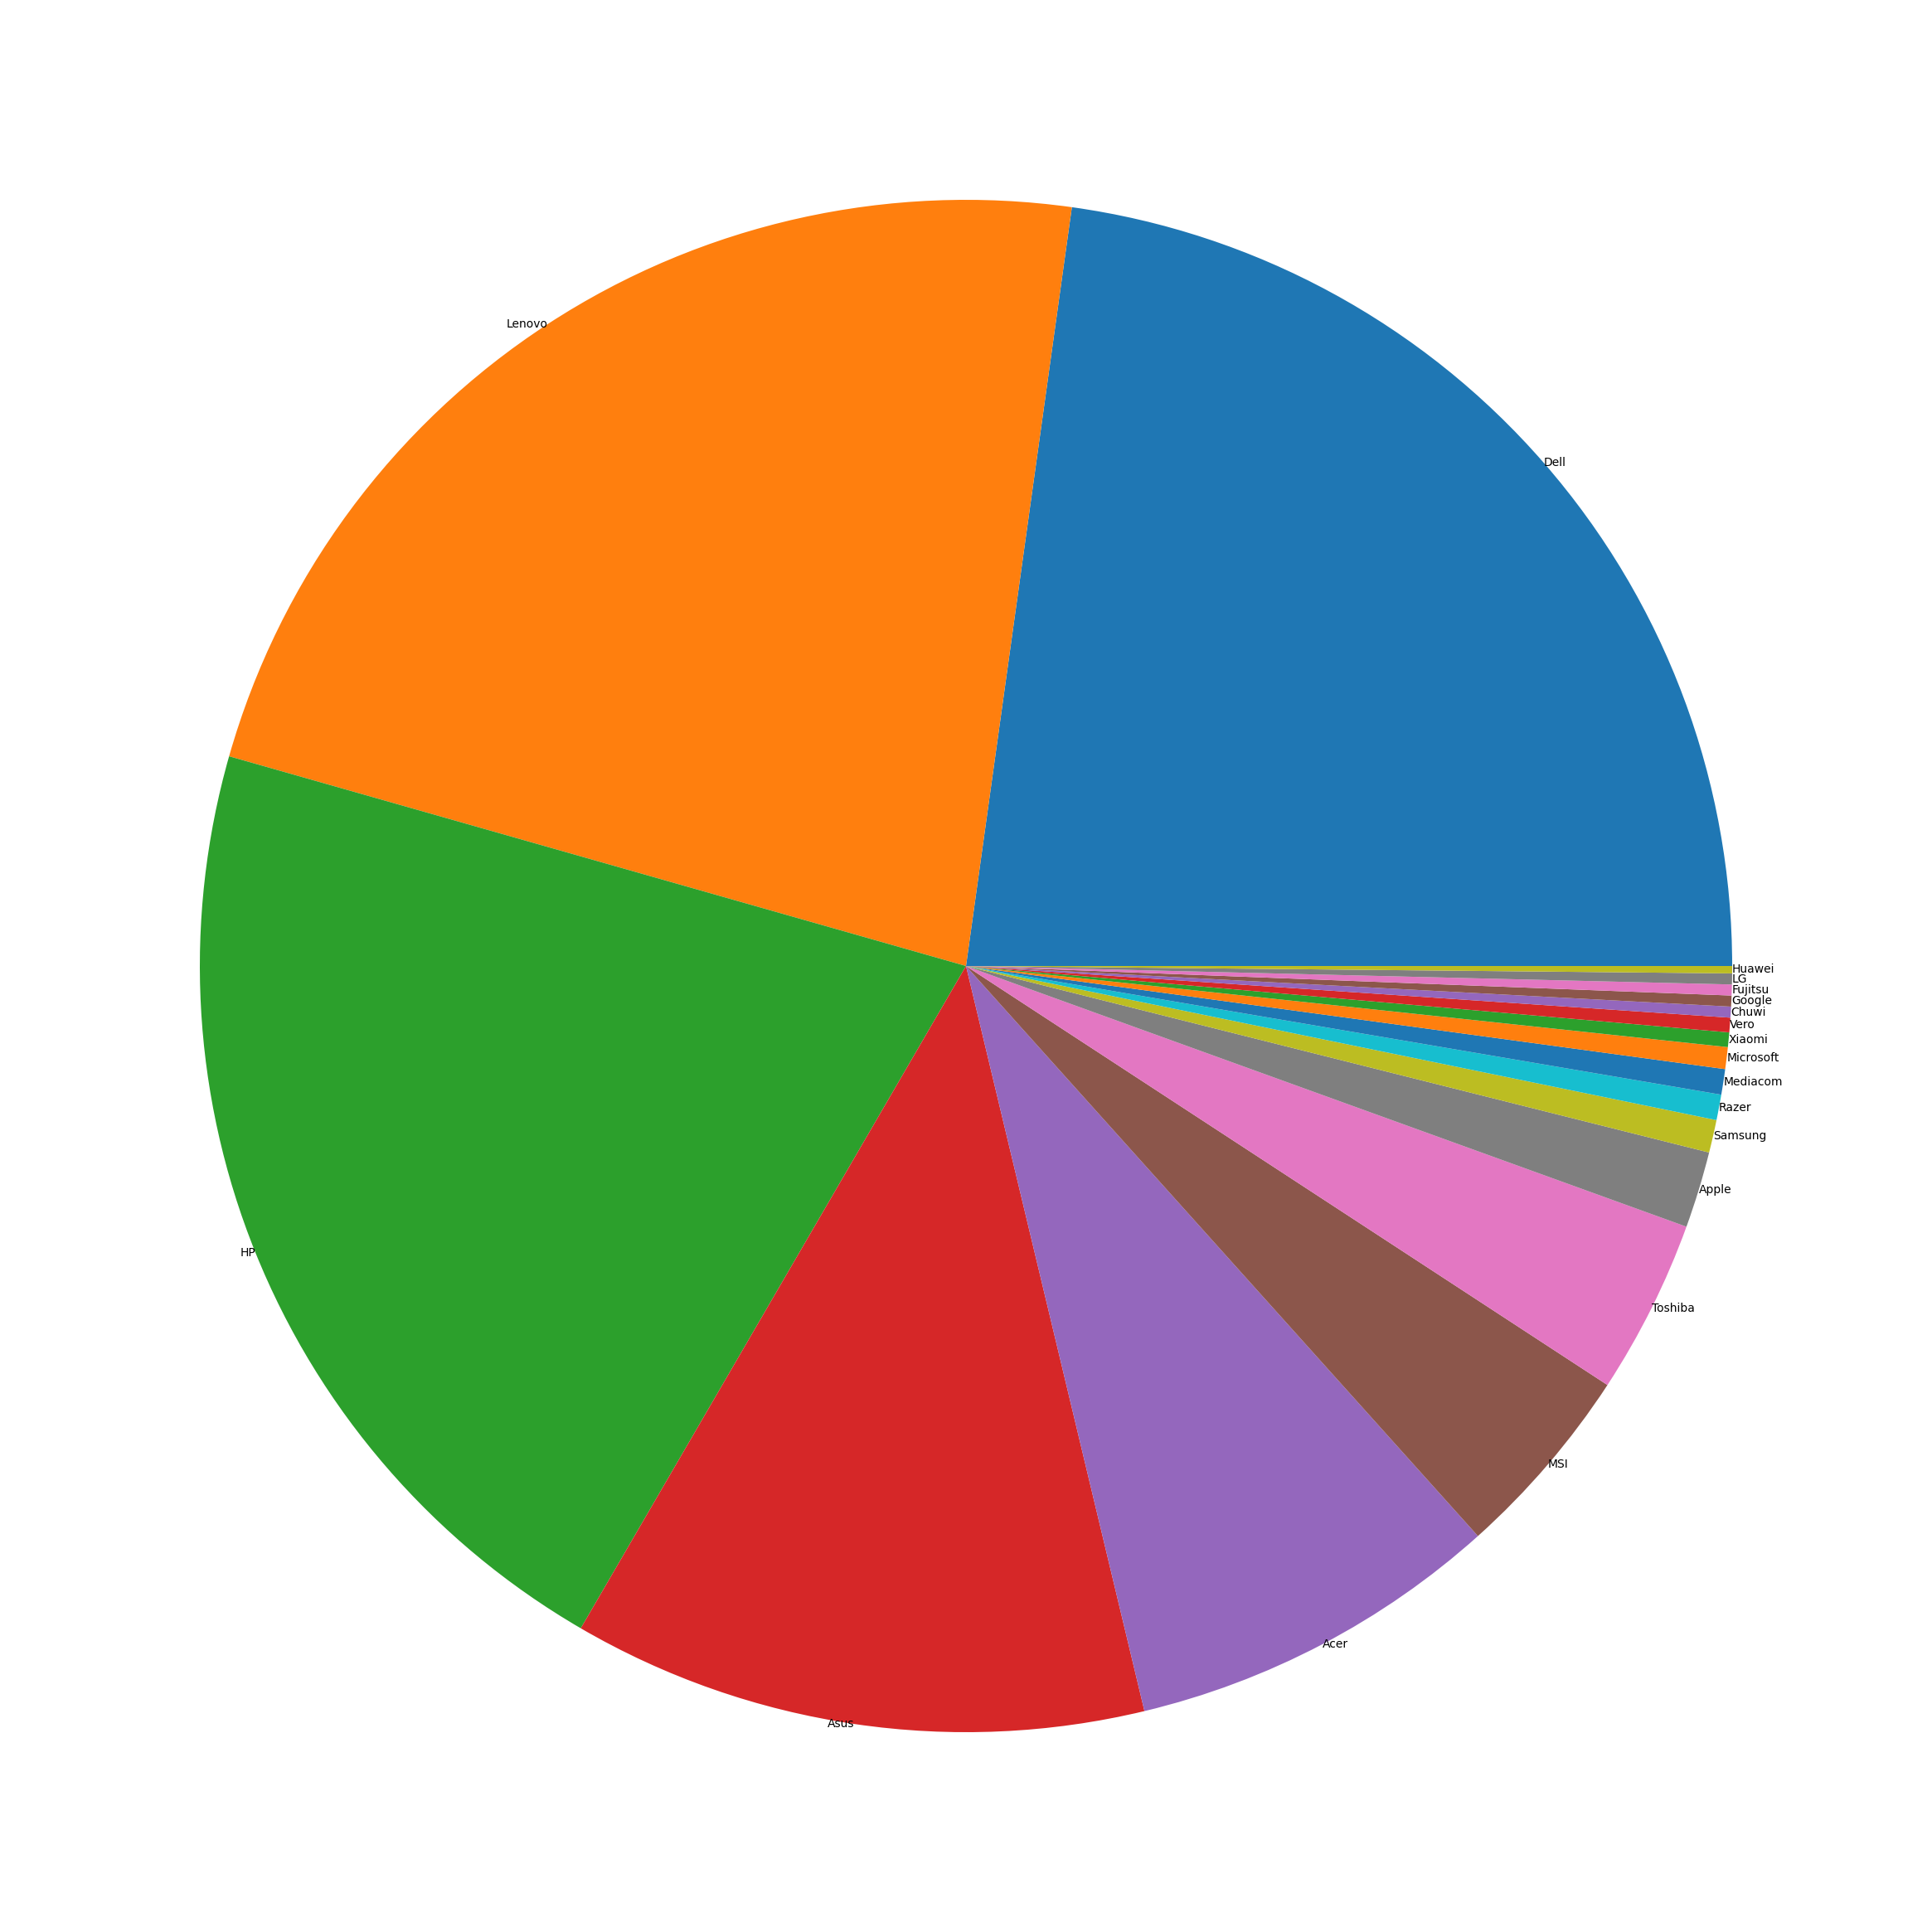

In [45]:
plt.figure(figsize=(30,30))
plt.pie(x=laptop_data["Company"].value_counts(),labels=laptop_data["Company"].value_counts().keys(),labeldistance=1)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
RFR= RandomForestRegressor()
param={
 "n_estimators":  randint(10,50),
    "criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_depth":  randint(2,10),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1,5),
    "max_features":  randint(1,10)

}
RS= RandomizedSearchCV(estimator=RFR,param_distributions=param,cv=3,n_iter=10,scoring="neg_root_mean_squared_error")


In [83]:
RS.fit(trainx,trainy)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a55597a70>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a55596b70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a55597260>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a555973b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a55596b40>},
                   scoring='neg_root_mean_squared_error')

In [94]:
RS.best_score_

-321.02117215430945

In [107]:
from sklearn.metrics import mean_squared_error
pred=RS.best_estimator_.predict(testx)
from scipy import stats
confidence= 0.95
squared_errors= (pred-testy)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()


321.344693419351

In [95]:
RS.score(testx,testy)

-329.6697032939482

In [99]:
max=testy.max()
min=testy.min()

In [106]:
print(f"Accuracy for Random_forest={(1-(-RS.best_score_/(max-min)))*100} %")

Accuracy for Random_forest=93.97143338677353 %


In [114]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
param ={
    "n_neighbors": randint(5,15),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": randint(10,60),
    "n_jobs": randint(5,20),
    "p": randint (1,10)
}
RSK=RandomizedSearchCV(KNN,param,cv=3,n_iter=10,scoring="neg_root_mean_squared_error")

In [115]:
RSK.fit(trainx,trainy)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a554b9dc0>,
                                        'n_jobs': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a554bbef0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a554a5a00>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x757a554baff0>,
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_root_mean_squared_error')

In [116]:
RSK.best_score_

-546.6613162561999

In [118]:
pred=RSK.best_estimator_.predict(testx)

In [121]:
squared_errors= (testy-pred)**2
confidence = 0.95
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()

531.3586909878186

In [117]:
print(f"Accuracy for Random_forest={(1-(-RSK.best_score_/(max-min)))*100} %")

Accuracy for Random_forest=89.73405978861597 %


In [ ]:
from sklearn.svm import SVR
